# Wheelchair Control

![](images/wheelchair.jpg)

small chage

### Python Dependencies

In [5]:
from numpy import *
from numpy.linalg import *

from scipy.linalg import *
from scipy.integrate import *
from scipy.signal import *

from matplotlib.pyplot import *

Step 1 - Wheelchair Planar Model
================================

### Introduction

We consider a simple model of a wheelchair evolving in the plane. It is mainly made of

  - A frame ; from above, its most visible component is the seat. We assume that it is a square,

  - Two fixed wheels (their orientation with respect to the frame does not change). 
    They are parallel and located at opposite ends of the seat. 
    
We assume that the seat backrest is on top of the wheels common axis.


Let $(0, e_x, e_y)$ be a direct orthonormal frame of the plane. We denote 

  - $(x, y)$ the coordinates of the wheel axis center in the orthonormal and 
  - $\theta$ the angle of the wheels direction with respect to vector $e_x$ ; with $\theta = 0$ when the front of the wheelchait faces the right ($e_x$) and $\theta = \pi/2$ when it faces upwards ($e_y$).

  - $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the wheelchair moves forward.

### Parameter Definition

From now on, we assume that the seat side length is $L = 50 \mbox{ cm}$ and the wheel radius is $R_w = 30 \mbox{ cm}$.

🧩 Define the corresponding Python variables `L` and `Rw` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values. 

In [7]:
L = 50 * 10**(-2)
Rw = 30 * 10**(-2)

### Graphical Representation

🧩 Implement a function `draw_wheelchair` with arguments `x`, `y` and `theta` that draws a simple geometric model of the wheelchair (with seat and fixed wheels) in the plane (top view) for arbitrary values of $(x, y)$ and $\theta$. 

🗝️ **Hint.** Use the function `plot` of `matplotlib.pyplot`.

In [8]:
def draw_wheelchair(x, y, theta):
    center_x = x 
    center_y = y
    theta = theta + pi/2
    
    seat_x1 = center_x - 0.5 * L * cos(theta) + 0.5 * L * sin(theta)
    seat_y1 = center_y - 0.5 * L * sin(theta) - 0.5 * L * cos(theta)
    seat_x2 = center_x + 0.5 * L * cos(theta) + 0.5 * L * sin(theta)
    seat_y2 = center_y + 0.5 * L * sin(theta) - 0.5 * L * cos(theta)
    seat_x3 = center_x + 0.5 * L * cos(theta) - 0.5 * L * sin(theta)
    seat_y3 = center_y + 0.5 * L * sin(theta) + 0.5 * L * cos(theta)
    seat_x4 = center_x - 0.5 * L * cos(theta) - 0.5 * L * sin(theta)
    seat_y4 = center_y - 0.5 * L * sin(theta) + 0.5 * L * cos(theta)

    wheel_x1 = center_x - L * sin(theta) - Rw * cos(theta)
    wheel_y1 = center_y + L * cos(theta) - Rw * sin(theta)
    wheel_x2 = center_x + L * sin(theta) - Rw * cos(theta)
    wheel_y2 = center_y - L * cos(theta) - Rw * sin(theta)

    wheel_x3 = center_x - L * sin(theta) + Rw * cos(theta)
    wheel_y3 = center_y + L * cos(theta) + Rw * sin(theta)
    wheel_x4 = center_x + L * sin(theta) + Rw * cos(theta)
    wheel_y4 = center_y - L * cos(theta) + Rw * sin(theta)

    # Plot the wheelchair seat and wheels
    plot([seat_x1, seat_x2, seat_x3, seat_x4, seat_x1], [seat_y1, seat_y2, seat_y3, seat_y4, seat_y1], 'k')
    plot([wheel_x1, wheel_x2], [wheel_y1, wheel_y2], 'k')
    plot([wheel_x3, wheel_x4], [wheel_y3, wheel_y4], 'k')
    plot(wheel_x1, wheel_y1, 'ko')
    plot(wheel_x2, wheel_y2, 'ko')
    plot(wheel_x3, wheel_y3, 'ko')
    plot(wheel_x4, wheel_y4, 'ko')

    # Plot the object coordinate frame
    x_axis_x = center_x + L * sin(theta)
    x_axis_y = center_y - L * cos(theta)
    y_axis_x = center_x + L * cos(theta)
    y_axis_y = center_y + L * sin(theta)

    plot([center_x, x_axis_x], [center_y, x_axis_y], 'r', linewidth=2)
    plot([center_x, y_axis_x], [center_y, y_axis_y], 'g', linewidth=2)
    plot(center_x, center_y, 'bo', markersize=8)

🧩 Represent the wheelchair when $(x, y, \theta) = (0, 0, 0), (2, 2, \pi/2), (0, 4, \pi), (-2, 2, 3\pi/2)$.

🗝️ **Hint.** Use the following `draw_arena` function beforehand.

In [9]:
def draw_arena(xmin, xmax, ymin, ymax):
    wh_ratio = (xmax - xmin) / (ymax - ymin)
    figsize = fig_width, fig_height = 16, 16 / wh_ratio
    figure(figsize=figsize)
    axes = gca()
    axes.axis([xmin, xmax, ymin, ymax])
    axes.set_aspect(1)
    xticks(arange(xmin, xmax+1, 1))
    yticks(arange(ymin, ymax+1, 1))
    grid(True)

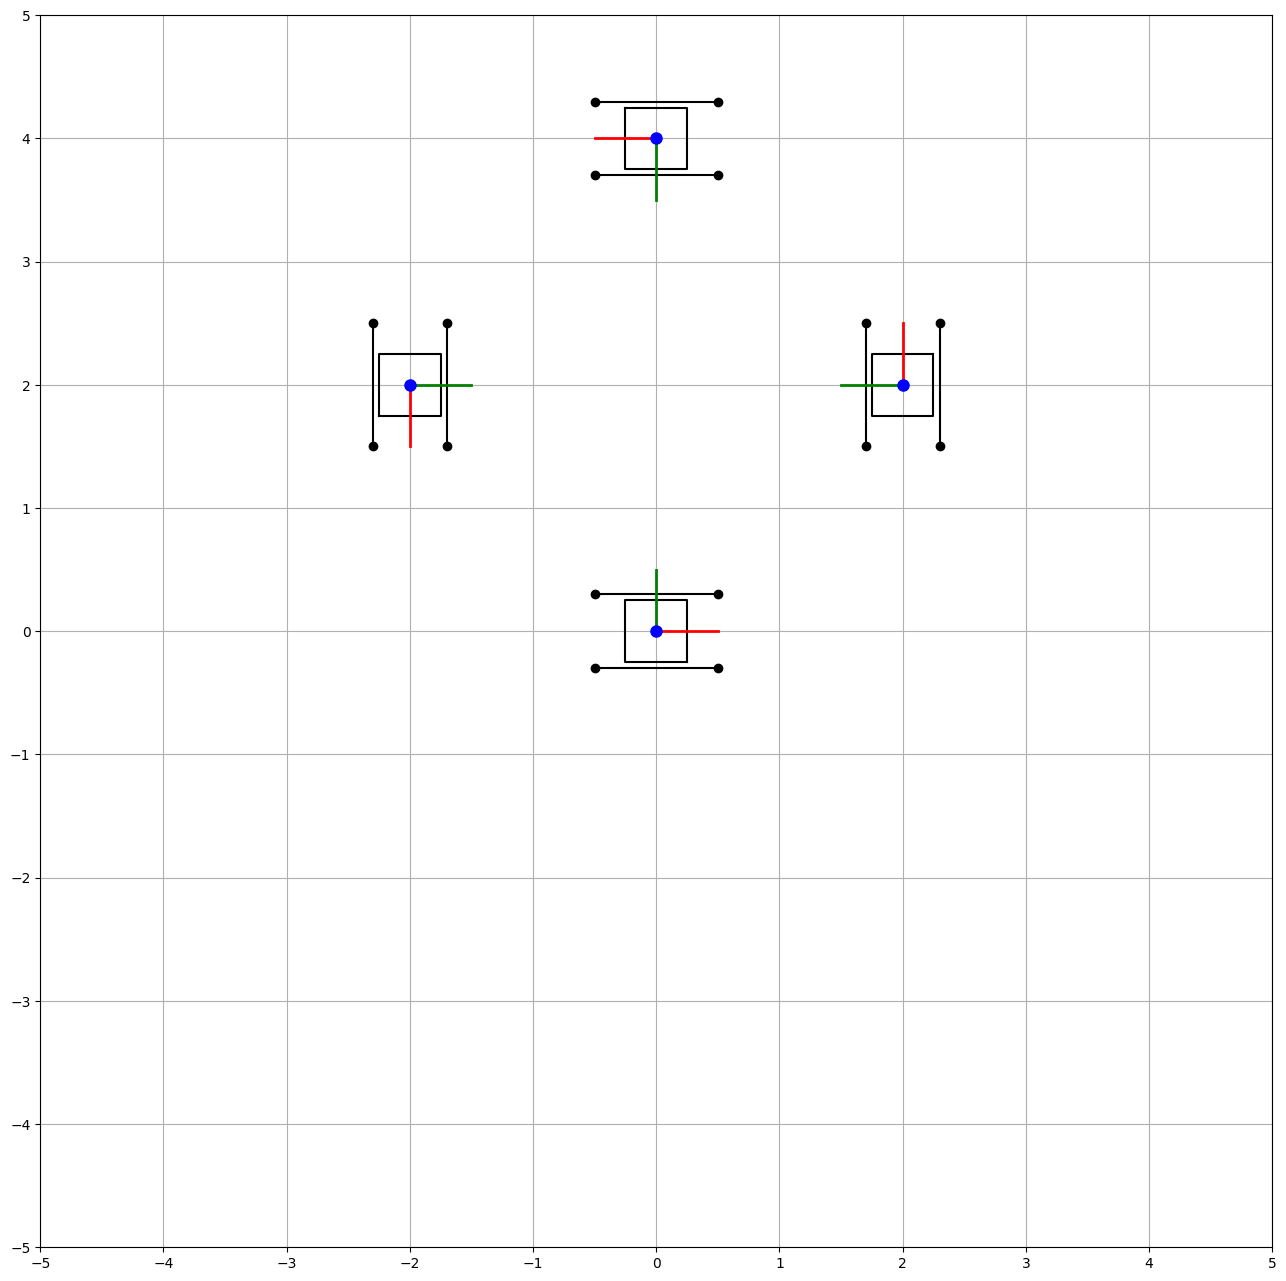

In [10]:
# drawing the world arena
draw_arena(-5, 5, -5, 5)

# (𝑥,𝑦,𝜃)=(0,0,0)
draw_wheelchair(0, 0, 0)

# (𝑥,𝑦,𝜃)=(2,2,𝜋/2)
draw_wheelchair(2, 2, pi/2)

# (𝑥,𝑦,𝜃)=(0,4,𝜋)
draw_wheelchair(0, 4, pi)

# (𝑥,𝑦,𝜃)=(−2,2,3𝜋/2)
draw_wheelchair(-2, 2, 3*pi/2)

show()

### Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the wheelchair).
We also assume that the wheelchair fixed wheels roll without slipping. 

🧩 Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

**Answer:**


Since we assume that the wheels roll without slipping : 
$v = R/2 * (w_l + w_r)$

Which can be decomposed into its components via $θ$, which gives us : 

$\dot{x} = v * cos(θ) = R/2 * (w_l + w_r) * cos(θ)$

$\dot{y} = v * sin(θ) = R/2 * (w_l + w_r) * sin(θ)$

And then since any difference in linear speed between right and left will induce a rotation over the plan's axis : 

$\dot{θ} = R / L * (w_r - w_l)$



### Analysis

🧩 Show that if $\omega_l$ and $\omega_r$ are continuously differentiable functions of $(x, y, \theta)$ (which includes the case of constant inputs), this system is well-posed.

**Answer:**

Since the inputs $w_l$ and $w_r$ are continuously differentiable functions, and from the previous answer $(\dot{x}, \dot{y}, \dot{θ})$ are functions of continuously differentiable functions (R and L included since constants). Then the system satisfies the Lipschitz condition, which induce that the system is well-posed

🧩 Show that if $\omega_l$ and $\omega_r$ are constants, the maximal solution associated to any initial state is global. Is is still true of $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$ ?

**Answer:**

If $w_l$ and $w_r$ are constants, the differential equations that link $(\dot{x}, \dot{y}, \dot{\theta})$ to $(w_l, w_r)$ are linear with constant coefficients. Which then implies that the maximal solution associated to any initial state is global. 

No, it is not true if $w_l$ and $w_r$ are arbitrary continuously differentiable. That is because the system of differential equations is nonlinear.


### Vector Field

In the sequel, `omega` is a function that computes the input vector $\omega := (\omega_l, \omega_r)$ given the time $t$ and $(x, y, \theta)$ (thus, it may depend on the time and/or on the system state if needed). For example:

In [11]:
def omega(t, xytheta):
    omega_l = (1 - L/4) * pi / Rw
    omega_r = (1 + L/4) * pi / Rw
    return array([omega_l, omega_r])

🧩 Implement a function `fun(t, xytheta)` that computes $(\dot{x}, \dot{y}, \dot{\theta})$ given the time $t$ and $(x,y,\theta)$ (and implicitly the inputs $\omega$ computed by the function `omega`).

In [12]:
def fun(t, xytheta):
    x, y, theta = xytheta
    omega_l, omega_r = omega(t, xytheta) # compute the inputs

    xdot = Rw/2 * (omega_l + omega_r) * np.cos(theta) # compute xdot
    ydot = Rw/2 * (omega_l + omega_r) * np.sin(theta) # compute ydot
    thetadot = Rw/L * (omega_r - omega_l) # compute thetadot
    return array([xdot, ydot, thetadot])

### Simulation Setup

🧩 Simulate the wheelchair dynamics for 4 seconds when $(x_0, y_0, \theta_0)(t=0) = (0.0, 0.0, 0.0)$,
and the wheels velocities are the constants $\omega_l = (1 - L/4)  \pi / R \mbox{ rad/s}$ and $\omega_r = (1 + L/4)  \pi / R_w \mbox{ rad/s}$.
(Compute the dense outputs.)
   

In [23]:
t_span = [0.0, 4]
xytheta0 = [0.0, 0.0, 0.0]
result = solve_ivp(fun=fun, t_span=t_span, y0=xytheta0, dense_output = True)

🧩 Use the simulation results to draw the graphs of $x(t)$, $y(t)$ and $\theta(t)$.

In [24]:
rt = result["t"]
x = result["y"][0]
y = result["y"][1]
theta = result["y"][2]
sol = result["sol"]

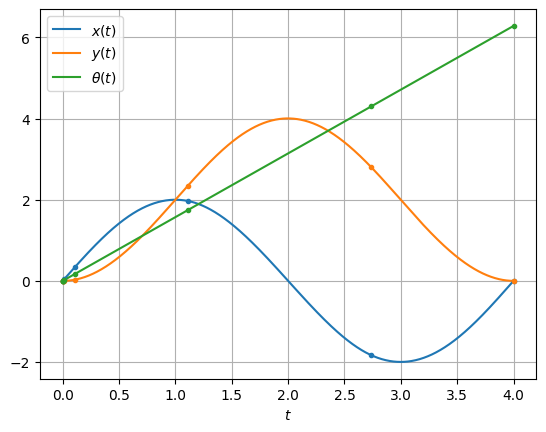

In [38]:
figure()
t = linspace(0, 4, 1000)
plot(t, sol(t)[0], "-", label="$x(t)$")
plot(t, sol(t)[1], "-", label="$y(t)$")
plot(t, sol(t)[2], "-", label="$ θ(t)$")
plot(rt, x, ".", color="C0")
plot(rt, y, ".", color="C1")
plot(rt, theta, ".", color="C2")
xlabel("$t$"); grid(); legend()

🧩 Use the simulation results to display the robot location every 0.5 second.

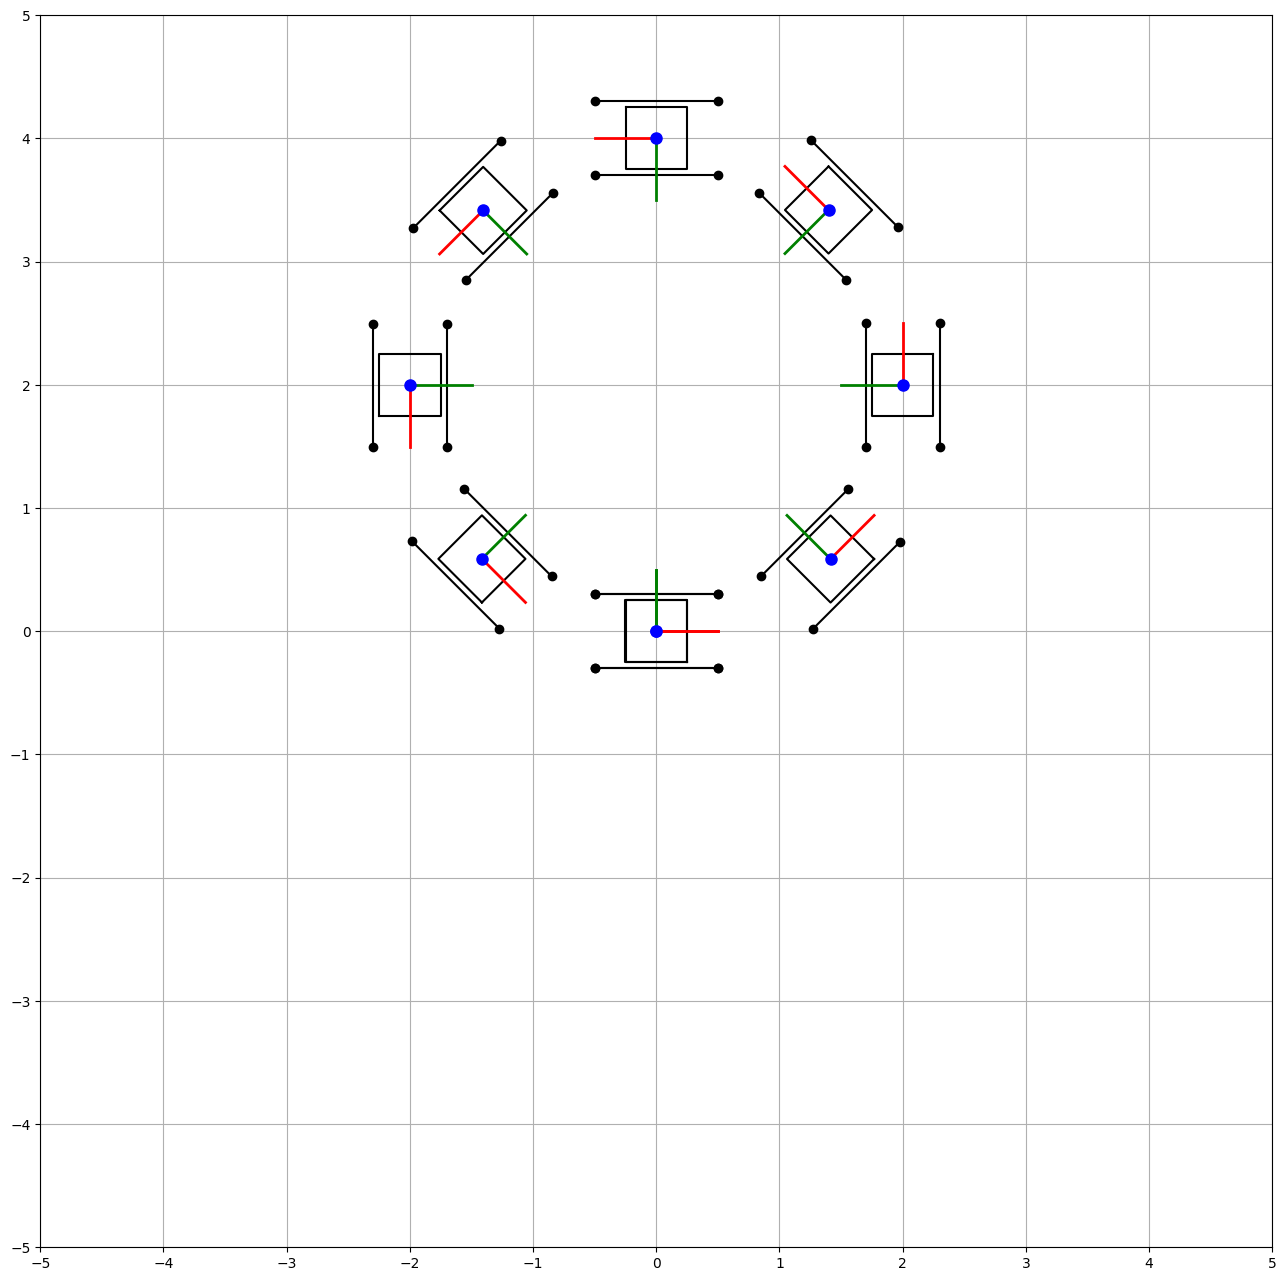

In [28]:
# drawing the world arena
limit = 5
draw_arena(-limit, limit, -limit, limit)

ts = [i*0.5 for i in range(9)]
for t in ts:
    draw_wheelchair(sol(t)[0],sol(t)[1],sol(t)[2])

show()

🧩 What should be the analytical expression of $x(t)$, $y(t)$ and $\theta(t)$? 

**Answer:**

Since $\dot{θ} = R/L (w_r - w_l)$

And $w_l$ and $w_r$ are constants, then $θ$ is gonna be a linear function over time. $θ(t) = R/L * (w_r - w_l) * t = w * t$

With $w = R/ L * (w_r - w_l)$

And since $\dot{x} = R/2 * (w_l + w_r) * cos(θ)$

And $\dot{y} = R/2 * (w_l + w_r) * sin(θ)$

Then $x$, $y$ will be sinusoïdal functions, i.e : $x(t) = L/2 * \frac{(w_r + w_l)}{w_r - w_l} * sin(θ(t))$ 

And $y(t) = L/2 * \frac{(w_r + w_l)}{w_r - w_l} *(1-cos(θ(t))) $


🧩 Do you experimental results match the theoretical results ? Draw the curves of the simulation error at time $t$ for $x$, $y$ and $\theta$.

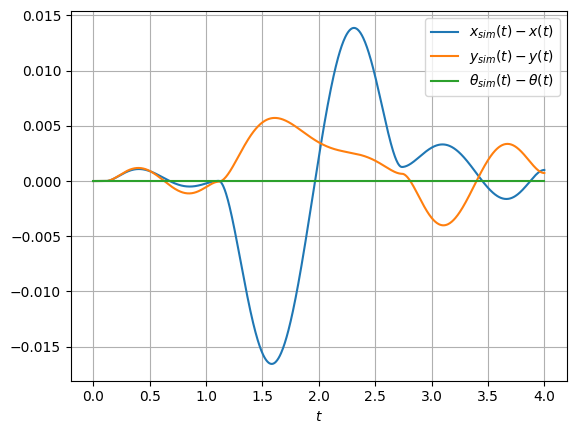

In [44]:
wl, wr = omega(0, [0,0,0])
def x(t):
    return L/2*(wl + wr)/(wr-wl)*sin(theta(t))
def y(t):
    return  L/2*(wl + wr)/(wr-wl)*(1-cos(theta(t)))
def theta(t):
    return Rw/L*(wr-wl)*t
    

figure()
t = linspace(0, 4, 1000)

plot(t, sol(t)[0] - x(t), "-", label="$x_{sim}(t) - x(t)$")
plot(t, sol(t)[1] - y(t), "-", label="$y_{sim}(t) - y(t)$")
plot(t, sol(t)[2] - theta(t), "-", label="$θ_{sim}(t) - θ(t)$")

xlabel("$t$"); grid(); legend()

🧩 If needed, adjust the simulation parameters until this error is uniformly less than $2 \times 10^{-5}$ for every component of $(x, y, \theta)$.

In [46]:
print(max(abs(sol(t)[0] - x(t))))
print(max(abs(sol(t)[1] - y(t))))
print(max(abs(sol(t)[2] - theta(t))))

0.016566402327272245
0.0057172302788388585
1.7763568394002505e-15


In [56]:
result = solve_ivp(fun=fun, t_span=t_span, y0=xytheta0, dense_output = True, atol = 1e-6, rtol = 1e-8)
sol = result["sol"]

In [57]:
print(max(abs(sol(t)[0] - x(t))))
print(max(abs(sol(t)[1] - y(t))))
print(max(abs(sol(t)[2] - theta(t))))

7.914137230946583e-06
8.171629176434436e-06
1.7763568394002505e-15


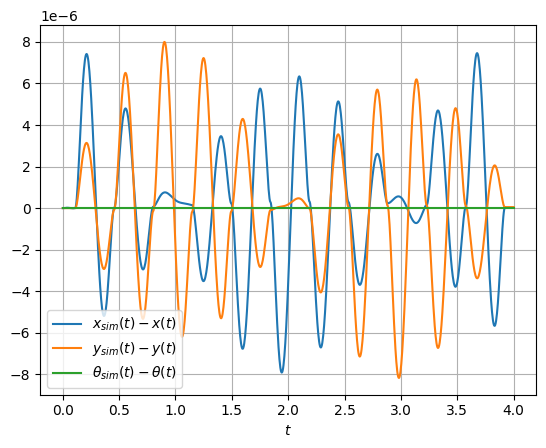

In [58]:
figure()
t = linspace(0, 4, 1000)

plot(t, sol(t)[0] - x(t), "-", label="$x_{sim}(t) - x(t)$")
plot(t, sol(t)[1] - y(t), "-", label="$y_{sim}(t) - y(t)$")
plot(t, sol(t)[2] - theta(t), "-", label="$θ_{sim}(t) - θ(t)$")

xlabel("$t$"); grid(); legend()

Time dependent inputs
---------------------

We are going to simulate the case of the chariot controlled by time-dependent angular velocities $\omega_l$ and $\omega_r$. 
We want a simulation lasting 5 seconds with the following inputs:
$$
    \omega_l(t) = \left\{
       \begin{array}{rl}
           (1 - L/4) \pi / R_w & \mbox{when $t \leq 1s$ or $t \geq 3$,} \\
           (1 + L/4) \pi / R_w & \mbox{otherwise.}
       \end{array}
    \right.
$$
and
$$
    \omega_r(t) = \left\{
       \begin{array}{rl}
           (1 + L/4) \pi / R_w & \mbox{when $t \leq 1s$ or $t \geq 3$,} \\
           (1 - L/4) \pi / R_w & \mbox{otherwise.}
       \end{array}
    \right.
$$

##### 🧩 Provide the new definition of `omega`

In [59]:
def omega(t, xytheta): 
    if t <= 1 or t >= 3 :
        omega_l = (1 - L/4) * pi / Rw
        omega_r = (1 + L/4) * pi / Rw
    else : 
        omega_l = (1 + L/4) * pi / Rw
        omega_r = (1 - L/4) * pi / Rw
    return array([omega_l, omega_r])


##### 🧩 Make a simulation of 3s of the robot with the previous input 

Use the `rtol` and `atol` that used to guarantee a precision of $10^{-5}$ and by using the `dense_output` option to evaluate the solution at timesteps that will be defined later.

🗝️ **Hint.** It is not necessary to define again the function `fun`. If the previous cell has been correctly validated, `fun` will use the new definition of `omega`. 

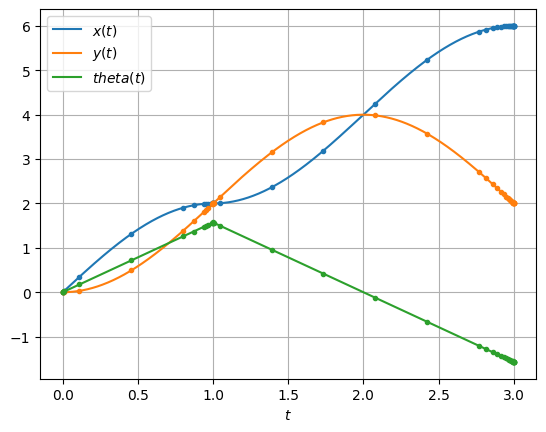

In [60]:
t_span = [0.0, 3] 
xytheta0 = [0.0, 0.0, 0.0]
result = solve_ivp(fun=fun, t_span=t_span, y0=xytheta0, dense_output = True, atol = 1e-6, rtol = 1e-10)

rt = result["t"]
x = result["y"][0]
y = result["y"][1]
theta = result["y"][2]
sol = result["sol"]

figure()
t = linspace(0, 3, 1000)
plot(t, sol(t)[0], "-", label="$x(t)$")
plot(t, sol(t)[1], "-", label="$y(t)$")
plot(t, sol(t)[2], "-", label="$theta(t)$")
plot(rt, x, ".", color="C0")
plot(rt, y, ".", color="C1")
plot(rt, theta, ".", color="C2")
xlabel("$t$"); grid(); legend()


🧩 Use the simulation results to display the robot location every 0.5 seconds.

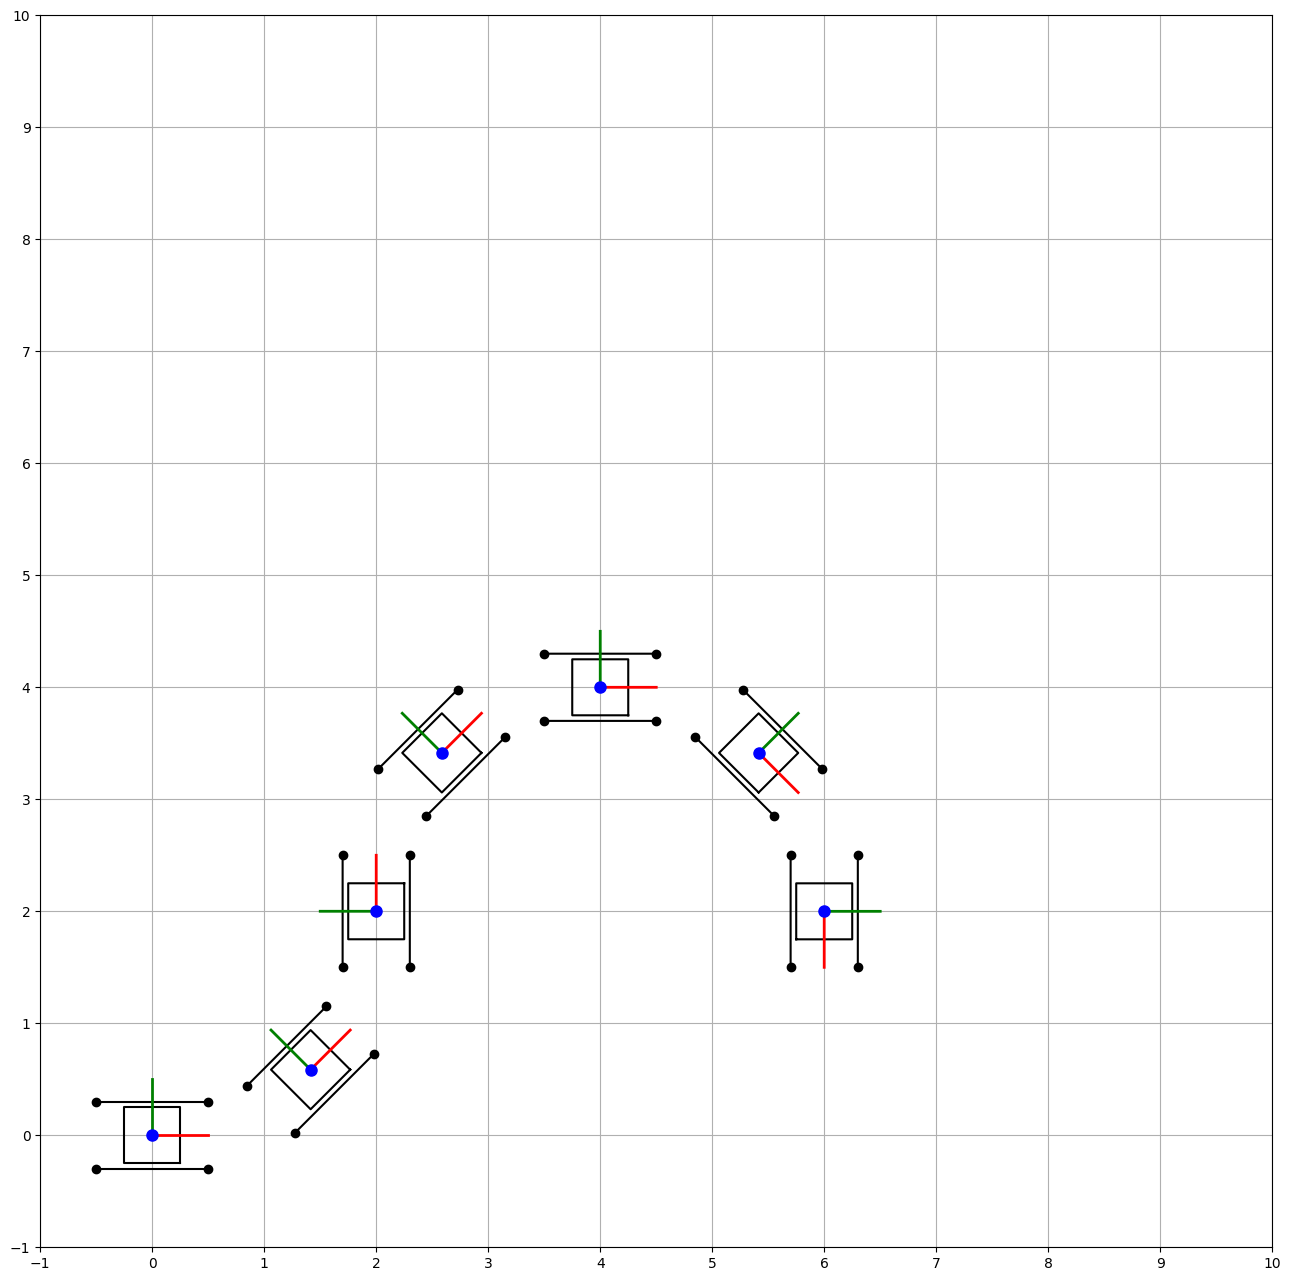

In [61]:
limit_r = 10 
limit_l = 1
draw_arena(-limit_l, limit_r, -limit_l, limit_r)

ts = [i*0.5 for i in range(7)]
for t in ts:
    draw_wheelchair(sol(t)[0],sol(t)[1],sol(t)[2])
show()


## Analysis of the system at rest

### Equilibrium

##### 🧩 Show that for a suitable (constant) choice $\omega_e \in \mathbb{R}^2$ of the vector input $\omega$, the state $X_e = (x_e, y_e, \theta_e) = (0,0,0)$ is an equilibrium of the wheelchair kinematic model.

**Answer:**

To find a suitable (constant) choice $w_e \in \mathbb{R^2}$ of the vector input $ω$, so that the state $X_e = (x_e, y_e, θ_e) = (0, 0, 0)$ is an equilibrium state, it has to satisfy the derivative equation fun(t,Xe) = 0. 
In other terms :   
 - $\dot{x} = \dot{y} = \dot{θ} = 0$

After plugging our wheelchair kinematic model in these equations, we find :    
 - $(w_{re} + w_{le}) * cos(θ_e) = 0 $
 - $(w_{re} + w_{le}) * sin(θ_e) = 0 $   
 - $ w_{re} - w_{le} = 0 $ 

By solving the third equation first, we obviously find that $w_{re} = w_{le} = w / 2$ 

With $w$ a constant. Which transforms the rest of the equations in : 
 - $w * cos(θ_e) = 0$
 - $w * sin(θ_e) = 0$

But since $θ_e$ has to be nul to be at equilibrium point, the second one is verified, and the first directly induces : $w = 0$ 

We can then conclude that $w_e$ has to be equal to $(0, 0)$


##### 🧩 Show that for any other $\omega_e$, the system has no equilibrium.

**Answer:**

The equilibrium conditions previously stated do not depend of the equilibrium state, which makes them general conditions. For the third condition to be satisfied, we need $w_r = w_l$. And for the first condition, if $w_e$ is a non-zero vector, then $cos(θ) = sin(θ) = 0$ which in turn implies that $cos(θ)^2 + sin(θ)^2 = 0$. Which is absurd. Therefore for any other $w_e$, there is no equilibrium

##### 🧩 Conversely, if $\omega = \omega_e$, what are the other equilibria of the system?

**Answer:**

As proved earlier, for any other point to be an equilibrium point of the system, it has to satisfy : 
 - $w_r = w_l$
 - $w * cos(θ_e) = 0$
 - $w * sin(θ_e) = 0$

And since $w_e$ is nul, any point in the plane with any angle theta satisfies the equilibrium condition.


### Linearized System Model


Let $\omega = \omega_e$ and $X_e = (0,0,0)$. Let us introduce the the error variable $\Delta X = (\Delta x, \Delta y, \Delta \theta) = X - X_e$ and $\Delta \omega = \omega - \omega_e$.

##### 🧩 Compute the corresponding linearized dynamics and put it in standard form: compute the matrices $A$ and $B$ (remember that $\omega = (\omega_l,\omega_r)$).

**Answer:**

### Stability of the linearized system

##### 🧩 Is the linearized system asymptotically stable around $(0,0,0)$ when $\Delta \omega = (0,0)$ ?

**Answer:**

##### 🧩 Is the original system asymptotically stable ? Or even (locally) attractive ? 

**Answer:**

### Controllability of the linearized system

In this section, we consider only the linearized system defined by the matrices $A$ and $B$ computed previously:

$$
\frac{\Delta X}{dt} = A \Delta X + B\Delta u
$$

##### 🧩 Is there an admissible trajectory that start with the state $X_0=(-2,0,0)$ and ends at origin after some time?  

**Answer:**

##### 🧩 Is there an admissible trajectory that start with the state $X_0=(0,2,0)$ and ends at origin after some time?  

**Answer:**

##### 🧩 Is the linearized system controllable?

**Answer:**

## Control on a straight line

### Admissible trajectories

Let $x_R(t) = v t$ and $y_R(t) = 0$ where $v \in \mathbb{R}$ and $v \neq 0$. 

##### 🧩 Determine the set of trajectories $X_R(t) = (x_R(t), y_R(t), \theta_R(t))$ which are admissible and compute the corresponding reference control $\omega_{R}(t)$.

**Answer:**

### Linearized system

Let $\Delta X(t) = X(t) - X_R(t)$ and $\Delta \omega(t) = \omega(t) - \omega_R(t)$.

##### 🧩 Compute the linearized dynamics of the system for the class of trajectory "moving forward".

**Answer:**

##### 🧩 Is the system asymptotically stable, with $\Delta\omega(t)=0$?

**Answer:**

##### 🧩 Is the system attractive, with $\Delta\omega(t)=0$?

**Answer:**

##### 🧩 Show that the linearized system is controllable.

**Answer:**

### Linearized system implementation

In the sequel, we will use $v=4.8 \mbox{ km/h}$.

##### 🧩 Implement and print the matrices $A$ and $B$

In [11]:
pass

The linear model has to be fed with some $\Delta\omega$ input. Like for the nonlinear system, we define a function $\Delta\omega(t,\Delta_X)$ that computes the input of the linearized system. For example, if we do not want any correction to the reference input, we set:

In [17]:
def deltaOmega(t, deltaX):
    return array([0, 0, 0])

##### 🧩 Using this function `deltaOmega`, define a function `lin_fun` that computes $d{\Delta X}/dt$ given the arguments `t` and `deltaX`$.

In [12]:
def lin_fun(t, deltaX):
    pass

### Controller Design on the linearized system

##### 🧩 Implement a process that computes a gain matrix $K$ that places the poles of the linearized system at some arbitrary location. 

For this question, we will chose 3 real poles close to -0.5.

Then, print the poles of the closed-loop system

$$
\frac{d\Delta X}{dt}= A \Delta X + B\Delta\omega
\; \mbox{ with } \;
\Delta\omega = -K \Delta X.
$$

In [13]:
pass

##### 🧩 Simulate the linearized system during 20s, with the initial condition $\Delta X(0) = (0,2,0)$.

In [14]:
pass

🧩 Plot the values of $\Delta x(t)$, $\Delta y(t)$ and $\Delta\theta(t)$ (**plot $\Delta\theta(t)$ in degrees**)

In [15]:
pass

##### 🧩 Why is it important to check that $\Delta\theta(t)$ stays small ?

**Answer:**

##### 🧩 Compute the corresponding values of $\Delta\omega_l,\Delta\omega_r$ and store them in the Python variables `dOmega_l`, `dOmega_r`

In [16]:
pass

##### 🧩 Compute $\omega_l,\omega_r$ and plot the translation speed of each wheels in km/h

In [17]:
pass

##### 🧩 Are these control values consistent with what the robot should do to cancel the error?

**Answer:**

###  Controller Tuning



##### 🧩 Tune the poles (and recompute the gain matrix) so that the actual location $(x, y)$ is within 10 cm of the desired location within 20 sec and the linear velocity of each wheel never exceeds $5$ km/h. Plot the values of $\Delta x$ (in m), $\Delta y$ (in m), $\Delta \theta$ (in degrees), and the speed of each wheel (in km/h)

In [18]:
pass

##### 🧩 Simulate the initial, nonlinear wheelchair model when the control law computed in the section "Controller Tuning" is applied. Check that the constraint given for the control law design still hold.

In [25]:
pass

##### 🧩 Display this trajectory using a snapshot of the wheelchair in the plane every second.

In [19]:
pass

In [29]:
def Compute_cost(deltaX, deltaOmega):
    pass

🧩 Test the function `Compute_cost`  with the controller you designed in the Section 'Controller Tuning' when $q_i=1$ and $r_i=1$ ($t_f=20$).

In [30]:
pass

🧩 Multiply by 10 the poles and test the function `Compute_cost` in this new case. Interpret the results. 

In [20]:
pass

🧩 Implement a process that computes a gain matrix $K$ that places the poles of the linearized system such that the quantity $J$ is minimum with "$t_f=+\infty$".

Then, for $q_i=1$, $r_i=1$, print the poles of the closed-loop system:

$$
\frac{\Delta X}{dt}= A \Delta X + B\Delta\omega
\; \mbox{ with } \;
\Delta\omega = -K \Delta X.
$$

In [21]:
pass

🧩 Plot the values of $\Delta x$ (in m), $\Delta y$ (in m), $\Delta \theta$ (in degrees), and the speed of each wheel (in km/h). Compute the value of the cost for $t_f=20$. Compare with the control law you obtained by pole assignment. Intepret the results.

In [22]:
pass

🧩 Try large values of $Q$ then large values of $R$ and explain how these choices influence the control effort as well as the convergence speed. Do you think that both strategies will perform similarly when applied to the wheelchair nonlinear model? Then select $Q$ and $R$ to ensure that the wheel velocity nevers exceeds 5 km/h and that $x$ and $y$ have less than 10 cm error after 20 sec. 

In [23]:
pass

### Controller validation

The goal of this part is to test the controller on the **true** non linear system.

We are going to simulate the original `fun` function, but to do this, we need to define a new version of the function `omega` that computes the wheel velocities given `t` and `xytheta`.
    
🧩 Implement this new version of `omega`.

In [24]:
pass

🧩 Simulate the true system during 20 sec using the pole placement controller designed during the 'Controller Tuning'.

In [25]:
pass

🧩 Plot $x(t)$, $y(t)$, $\theta(t)$, $\omega_l(t)$ and $\omega_r(t)$.

In [26]:
pass

🧩 Use the simulation results to display the wheelchair location every 1 second.

In [27]:
pass

🧩 Make a similar drawing but add to the wheelchair real location the wheelchair reference location in the background; use the blue color to represent this "virtual" weelchair.

In [28]:
pass

🧩 We now aim to compare the different control strategies. We consider the pole placement strategy and two optimal controllers (one with a large $Q$ and one with a large $R$). Run the simulations with the these extreme controllers, then with the controller that met the design constraints when tested on the linear model. Adjust slightly the parameters of the latter model if the constraints are not met anymore, so that they are met again.

In [29]:
pass

🧩 Your wheelchair faces some strong wind (constant speed). How can you model the effect of this wind? Show the impact on the performance of your controller (with your controller of your choice).

In [30]:
pass

🧩 What happens if the controller brutally stops at t=10s?

In [55]:
pass

🧩 What if additionally to the initial position mismatch the wheelchair starts with a wrong orientation (say $\theta=\pi/2$)?

In [31]:
pass

🧩 Write the coordinates $(x_f, y_f)$ of this location as a function of $x$, $y$ and $\theta$. 

**Answer:**

🧩 Write the differential equation satisfied by $(x_f, y_f)$. 

**Answer:**

🧩 Show any (smooth) reference evolution of the person feet $(x_f^r(t), y_f^r(t))$ and any initial state of the wheelchair consistent with the initial feet location, there is an admissible trajectory $(x(t), y(t), \theta(t))$ that corresponds to this reference. Hint: search the unique $\omega_l(t)$ and $\omega_r(t)$ -- as functions of $\dot{x}_f^r(t)$, $\dot{y}_f^r(t)$ and $\theta(t)$ -- that satisfies this property. 

**Answer:**

🧩 Let $v>0$ be the value in m/s that corresponds to $4.8$ km/h and let $(x_f^r(t), y_f^r(t)) = (vt, 0)$.
Simulate the wheelchair evolution with the choice for $\omega_l$ and $\omega_r$ of the previous question for $X(0) = (-L-M, 0, 0)$. Represent the wheelchair every second with an extra dot for the feet location.

Then, try the simulation with 
$$
X(0) = (-(L+M)\cos(\theta), -(L+M)\sin(\theta),\alpha)
$$ 
for different values of $\alpha = \theta(0)$. In particular, investigate the case of à $\theta(0)$ close to $0$, then close to $\pi$). Is the system dynamics asymptotically stable in each case?

In [32]:
pass

🧩 Consider three pillars (of small radius) whose centers are aligned and distant of 2 meters, say at the locations
$$
(1.0,0), (3.0, 0) \mbox{ and } (5.0,0).
$$
Compute a reference trajectory trajectory that would lead the feetfrom $(0,0)$ to $(6,0)$ with a slalom between the pillars. Of course, you don't want the robot frame to bump into the pillars ! Display this trajectory graphically. What happens when if the inputs $\omega_l(t)$ and $\omega_r(t)$ are applied but the robot is not initially at the expected position ?

**Answer:**

In [33]:
pass